In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [2]:
df_airline = pd.read_csv("data/lab2-airline-20231026.csv", encoding="cp949")

In [3]:
df_airline["시점"] = df_airline["시점"].astype("object")

In [4]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3696 entries, 0 to 3695
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   시점        3696 non-null   object
 1   항공사별(1)   3696 non-null   object
 2   도착출발별(1)  3696 non-null   object
 3   운항 (편)    3696 non-null   int64 
 4   여객 (명)    3696 non-null   int64 
 5   화물 (톤)    3696 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 173.4+ KB


In [5]:
df_airline.head()

,시점,항공사별(1),도착출발별(1),운항 (편),여객 (명),화물 (톤)
0,2005.01,아시아나항공,도착,6613,791439,28012
1,2005.01,아시아나항공,출발,6610,799835,29576
2,2005.01,대한항공,도착,8869,1372897,70544
3,2005.01,대한항공,출발,8870,1405847,78329
4,2005.01,외항사,도착,3145,443386,28311


## Q. 항공사별로 연간 평균 여객 수 계산

In [6]:
average_passengers_by_airline = df_airline.groupby("항공사별(1)")["여객 (명)"].mean()

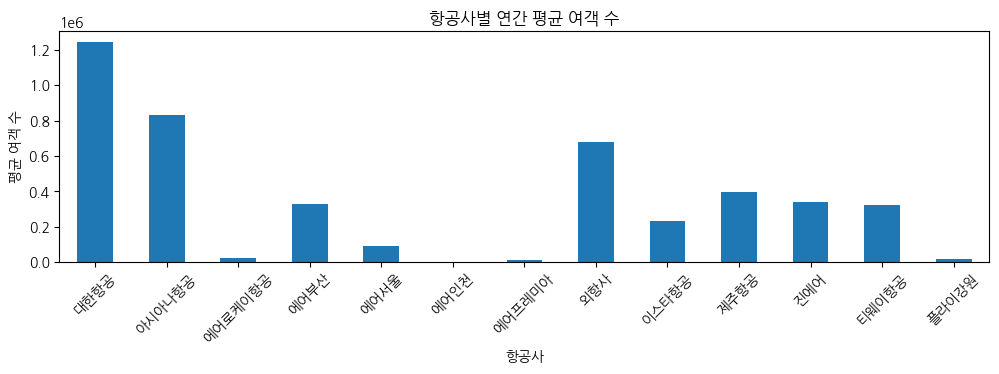

In [7]:
plt.figure(figsize=(12, 3))
average_passengers_by_airline.plot(kind="bar")
plt.title("항공사별 연간 평균 여객 수")
plt.xlabel("항공사")
plt.ylabel("평균 여객 수")
plt.xticks(rotation=45)
plt.show()

## Q. 연간 운항 및 여객 증가율

In [8]:
# 연간 운항 편수 증가율 계산
df_airline["운항 (편)_증가율"] = df_airline.groupby("항공사별(1)")["운항 (편)"].pct_change() * 100

# 연간 여객 수 증가율 계산
df_airline["여객 (명)_증가율"] = df_airline.groupby("항공사별(1)")["여객 (명)"].pct_change() * 100

In [9]:
df_airline

,시점,항공사별(1),도착출발별(1),운항 (편),여객 (명),화물 (톤),운항 (편)_증가율,여객 (명)_증가율
0,2005.01,아시아나항공,도착,6613,791439,28012,NaN,NaN
1,2005.01,아시아나항공,출발,6610,799835,29576,-0.045365,1.060852
2,2005.01,대한항공,도착,8869,1372897,70544,NaN,NaN
3,2005.01,대한항공,출발,8870,1405847,78329,0.011275,2.400034
4,2005.01,외항사,도착,3145,443386,28311,NaN,NaN
...,...,...,...,...,...,...,...,...
3691,2023.08,에어로케이항공,출발,352,53311,306,0.000000,-1.503926
3692,2023.08,에어프레미아,도착,126,35608,1474,-2.325581,-7.574106
3693,2023.08,에어프레미아,출발,125,35836,1690,-0.793651,0.640306
3694,2023.08,외항사,도착,6705,1118720,52006,1.698771,5.884647


## Q. 도착/출발별로 연간 운항 및 여객

In [10]:
# 도착별 연간 운항 편수 및 여객 수 분석
arrival_stats = df_airline[df_airline["도착출발별(1)"] == "도착"].groupby("시점")[["운항 (편)", "여객 (명)"]].sum()

# 출발별 연간 운항 편수 및 여객 수 분석
departure_stats = df_airline[df_airline["도착출발별(1)"] == "출발"].groupby("시점")[["운항 (편)", "여객 (명)"]].sum()

In [11]:
arrival_stats

,운항 (편),여객 (명)
시점,,
2005.01,18627,2607722
2005.02,17112,2451062
2005.03,18342,2462065
2005.04,18735,2823164
2005.05,19511,2836185
...,...,...
2023.04,31189,5233125
2023.05,33421,5529102
2023.06,33028,5618913


<Axes: xlabel='시점'>

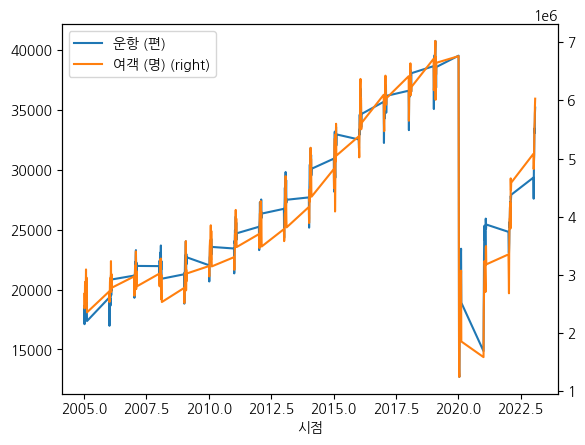

In [12]:
departure_stats.plot(secondary_y="여객 (명)")

## Q. 시간에 따른 화물 운송량

In [13]:
# 시간에 따른 화물 운송량 시각화
df_airline["시점"] = pd.to_datetime(df_airline["시점"])

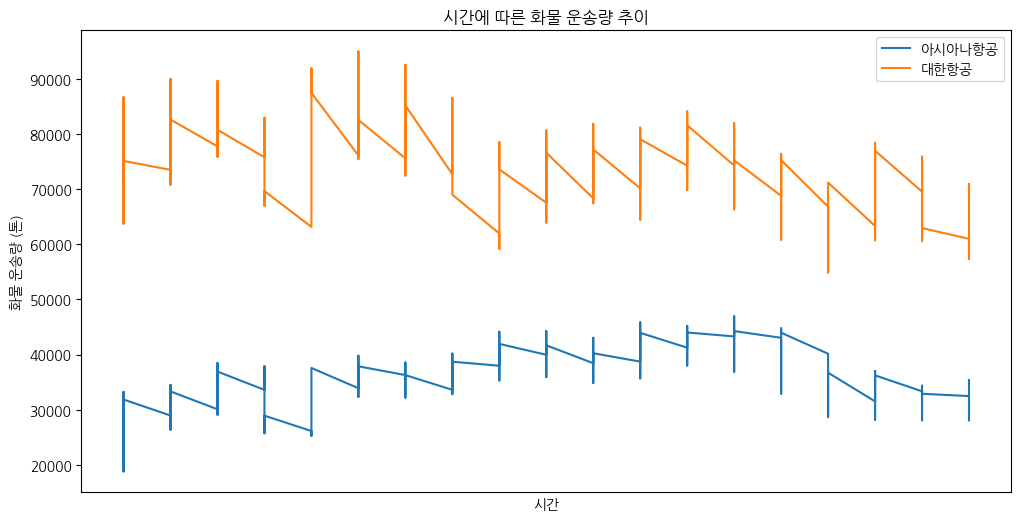

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(df_airline[df_airline["항공사별(1)"] == "아시아나항공"]["시점"], df_airline[df_airline["항공사별(1)"] == "아시아나항공"]["화물 (톤)"], label="아시아나항공")
plt.plot(df_airline[df_airline["항공사별(1)"] == "대한항공"]["시점"], df_airline[df_airline["항공사별(1)"] == "대한항공"]["화물 (톤)"], label="대한항공")
plt.xlabel("시간")
plt.ylabel("화물 운송량 (톤)")
plt.legend()
plt.title("시간에 따른 화물 운송량 추이")
plt.show()

In [15]:
df_airline = pd.read_csv("data/lab2-airline-20231026.csv", encoding="cp949")
# df_airline = pd.read_csv("lab2-airline-20231026.csv", encoding="cp949", dtype={"시점": "object"})
df_airline["시점"] = df_airline["시점"].astype("object")
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3696 entries, 0 to 3695
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   시점        3696 non-null   object
 1   항공사별(1)   3696 non-null   object
 2   도착출발별(1)  3696 non-null   object
 3   운항 (편)    3696 non-null   int64 
 4   여객 (명)    3696 non-null   int64 
 5   화물 (톤)    3696 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 173.4+ KB


In [16]:
df_airline.columns = ['시점', '항공사', '도착출발', '운항_편', '여객_명', '화물_톤']
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3696 entries, 0 to 3695
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시점      3696 non-null   object
 1   항공사     3696 non-null   object
 2   도착출발    3696 non-null   object
 3   운항_편    3696 non-null   int64 
 4   여객_명    3696 non-null   int64 
 5   화물_톤    3696 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 173.4+ KB


In [17]:
df_airline["연도"] = df_airline["시점"].astype(str).str[:4].astype(int)
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3696 entries, 0 to 3695
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시점      3696 non-null   object
 1   항공사     3696 non-null   object
 2   도착출발    3696 non-null   object
 3   운항_편    3696 non-null   int64 
 4   여객_명    3696 non-null   int64 
 5   화물_톤    3696 non-null   int64 
 6   연도      3696 non-null   int32 
dtypes: int32(1), int64(3), object(3)
memory usage: 187.8+ KB


In [18]:
df_airline["월"] = df_airline["시점"].astype(str).map(lambda x: x.split(".")[1][:2]).astype(int)
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3696 entries, 0 to 3695
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시점      3696 non-null   object
 1   항공사     3696 non-null   object
 2   도착출발    3696 non-null   object
 3   운항_편    3696 non-null   int64 
 4   여객_명    3696 non-null   int64 
 5   화물_톤    3696 non-null   int64 
 6   연도      3696 non-null   int32 
 7   월       3696 non-null   int32 
dtypes: int32(2), int64(3), object(3)
memory usage: 202.3+ KB


In [19]:
# 데이터의 개수 => 통계치가 아님에 주의
# 데이터 전처리가 잘 되었는지 확인하는 용도
pd.crosstab(df_airline["연도"], df_airline["월"])

월,1,2,3,4,5,6,7,8,9,11,12
연도,,,,,,,,,,,
2005,12,6,6,6,6,6,6,6,6,6,6
2006,14,6,6,6,6,8,8,8,8,8,8
2007,16,8,8,8,8,8,8,8,8,8,8
2008,20,8,8,8,8,8,10,10,10,12,12
2009,28,14,14,14,14,14,14,14,14,14,14
2010,30,14,14,14,14,14,14,14,16,16,16
2011,32,16,16,16,16,16,16,16,16,16,16
2012,32,16,16,16,16,16,16,16,16,16,16
2013,34,16,18,18,18,18,18,18,18,18,18


In [20]:
year_comp = pd.crosstab(index=df_airline["연도"], columns=df_airline["항공사"], values=df_airline["여객_명"], aggfunc="sum").fillna(0)
year_comp.style.background_gradient(axis=None).format("{:,.0f}")
year_comp

항공사,대한항공,아시아나항공,에어로케이항공,에어부산,에어서울,에어인천,에어프레미아,외항사,이스타항공,제주항공,진에어,티웨이항공,플라이강원
연도,,,,,,,,,,,,,
2005,34721098.0,18535331.0,0.0,0.0,0.0,0.0,0.0,11319209.0,0.0,0.0,0.0,0.0,0.0
2006,34990013.0,19284957.0,0.0,0.0,0.0,0.0,0.0,12856097.0,0.0,508612.0,0.0,0.0,0.0
2007,34654664.0,19352387.0,0.0,0.0,0.0,0.0,0.0,15483064.0,0.0,1649508.0,0.0,0.0,0.0
2008,33096441.0,19786251.0,0.0,205580.0,0.0,0.0,0.0,14579456.0,0.0,1955455.0,329510.0,0.0,0.0
2009,30397856.0,18103278.0,0.0,2841444.0,0.0,0.0,0.0,11579865.0,1996549.0,2902584.0,2431545.0,0.0,0.0
2010,33095526.0,19470441.0,0.0,4134712.0,0.0,0.0,0.0,13495430.0,3726008.0,3960525.0,3009247.0,308876.0,0.0
2011,31644789.0,19692263.0,0.0,4632692.0,0.0,0.0,0.0,14590031.0,3366115.0,5365058.0,3096266.0,2999202.0,0.0
2012,32412913.0,20541440.0,0.0,4955130.0,0.0,0.0,0.0,15982369.0,3918272.0,6551702.0,3893786.0,3498629.0,0.0
2013,30837092.0,21158822.0,0.0,5855989.0,0.0,0.0,0.0,17819459.0,4639327.0,7567220.0,4655414.0,4106794.0,0.0


In [21]:
df_airline["항공사"].unique()

array(['아시아나항공', '대한항공', '외항사', '제주항공', '진에어', '에어부산', '이스타항공', '티웨이항공',
       '에어인천', '에어서울', '플라이강원', '에어로케이항공', '에어프레미아'], dtype=object)

<Axes: title={'center': '저가항공 연도별 여객 수'}, xlabel='연도'>

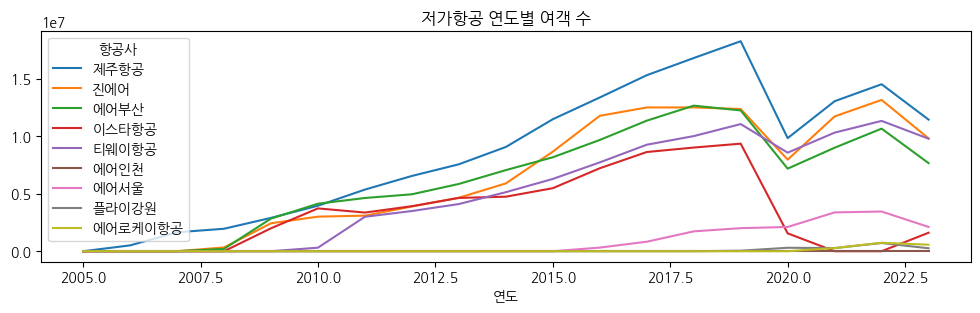

In [22]:
year_comp[['제주항공', '진에어', '에어부산', '이스타항공', '티웨이항공', '에어인천', '에어서울', '플라이강원', '에어로케이항공']].plot(figsize=(12, 3), title="저가항공 연도별 여객 수")

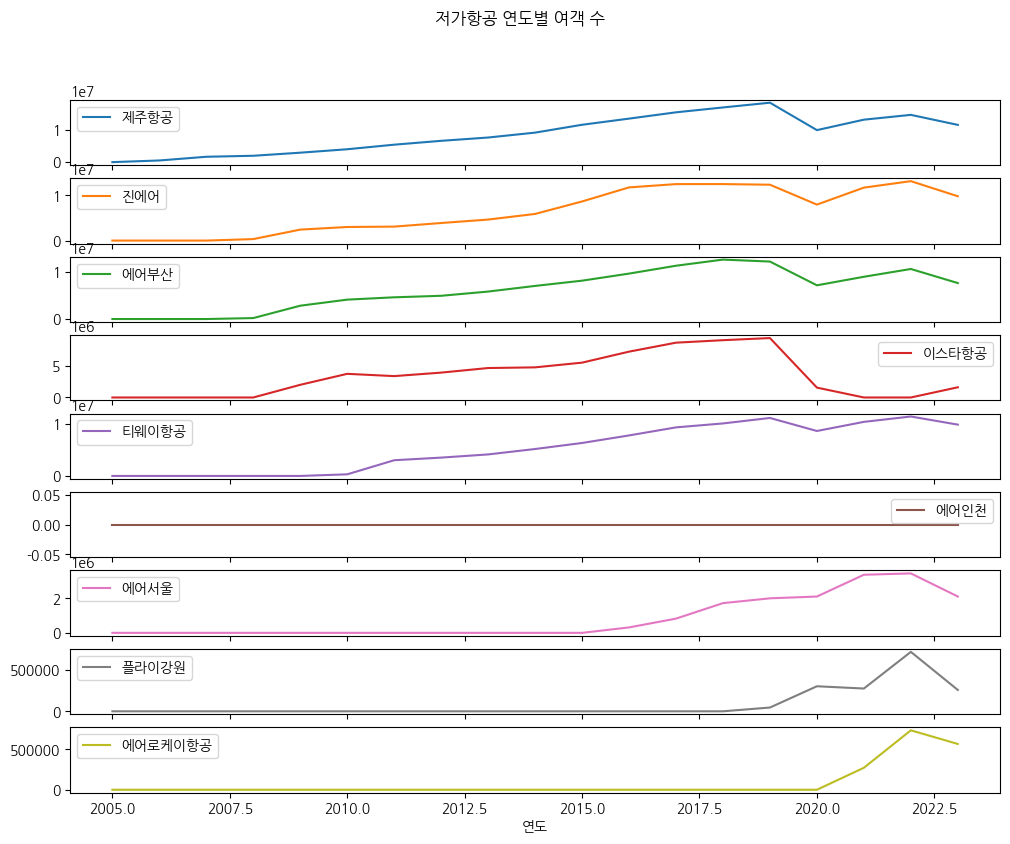

In [23]:
year_comp[['제주항공', '진에어', '에어부산', '이스타항공', '티웨이항공', '에어인천', '에어서울', '플라이강원', '에어로케이항공']].plot(figsize=(12, 9), title="저가항공 연도별 여객 수", subplots=True);

In [24]:
year_comp = pd.crosstab(index=df_airline["연도"], columns=df_airline["항공사"], values=df_airline["운항_편"], aggfunc="sum").fillna(0)
year_comp.style.background_gradient(axis=None, cmap="Greens").format("{:,.0f}")
year_comp

항공사,대한항공,아시아나항공,에어로케이항공,에어부산,에어서울,에어인천,에어프레미아,외항사,이스타항공,제주항공,진에어,티웨이항공,플라이강원
연도,,,,,,,,,,,,,
2005,211868.0,149283.0,0.0,0.0,0.0,0.0,0.0,80798.0,0.0,0.0,0.0,0.0,0.0
2006,212738.0,146808.0,0.0,0.0,0.0,0.0,0.0,98587.0,0.0,9568.0,0.0,0.0,0.0
2007,220360.0,145843.0,0.0,0.0,0.0,0.0,0.0,126258.0,0.0,27152.0,0.0,0.0,0.0
2008,217270.0,156893.0,0.0,2988.0,0.0,0.0,0.0,122093.0,0.0,25850.0,4176.0,0.0,0.0
2009,205682.0,138039.0,0.0,29782.0,0.0,0.0,0.0,87488.0,16339.0,29684.0,20238.0,0.0,0.0
2010,205596.0,134779.0,0.0,37230.0,0.0,0.0,0.0,95422.0,28387.0,26449.0,18761.0,3286.0,0.0
2011,204322.0,138614.0,0.0,38162.0,0.0,0.0,0.0,103867.0,26739.0,32030.0,20072.0,19789.0,0.0
2012,214577.0,141423.0,0.0,39710.0,0.0,0.0,0.0,113579.0,30227.0,39696.0,24249.0,21502.0,0.0
2013,210492.0,147175.0,0.0,46911.0,0.0,416.0,0.0,125595.0,33275.0,45558.0,29018.0,24049.0,0.0
